Title

Introduction

    Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
    
    Clearly state the question you will try to answer with your project
    
    
    Identify and describe the dataset that will be used to answer the question

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(gridExtra)
options(repr.plot.width=15, repr.plot.height=6)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.3     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.0
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.5     ✔ rsample      1.2.0
✔ dials        1.2.0     ✔ tune         1.1.2
✔ infer        1.0.5     ✔ workflows    1.1.3
✔ modeldata    1.2.0     ✔ workflowsets 1.0.1
✔ parsnip      1.1.1     ✔ yardstick    1.2.0
✔ recipes      1.0.8     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# set seed
set.seed(3456) 
# retrieve data
dataUrl <- "https://raw.githubusercontent.com/rjarvi/dsci_100_group_21/main/heart%2Bdisease/processed.cleveland.data"
colNames <- c("age","sex","cp","restingbps","chollevels","fbs","restecg","maxheartrate","exang","stdepress", "slope", "ca", "thal", "diagnosis")
rawdata <- read.csv(url(dataUrl), header=FALSE, col.names = colNames)

In [3]:
#data cleaning and modification
heartdf <- rawdata |> select(age, restingbps, chollevels, maxheartrate, stdepress, diagnosis)
heartdf <- replace(heartdf, heartdf == "?", NA)
heartdf <- mutate(heartdf, diagnosis = ifelse(diagnosis >= 1, 1, diagnosis))
heartdf <- heartdf |>
    mutate(diagnosis = factor(ifelse(diagnosis == 0, "No", "Yes"), levels = c("No", "Yes")))

heart_split <- initial_split(heartdf, prop = 0.75, strata = diagnosis)
heart_train <- training(heart_split)
heart_test <- testing(heart_split)
heart_train_no_class <- select(heart_train, age, restingbps, chollevels, maxheartrate, stdepress)

In [4]:
summary_stats <- heart_train_no_class |>
    sapply(function(x) {
    if(is.numeric(x)) {
        c(
            mean = round(mean(x, na.rm = TRUE), 2),
            sd = round(sd(x, na.rm = TRUE), 2),
            min = round(min(x, na.rm = TRUE), 1),
            max = round(max(x, na.rm = TRUE), 1),
            empty_cells = as.integer(sum(is.na(x))),
            entry_count = as.integer(sum(!is.na(x)))
        )
        } else {
            NULL
        }
})

summary_df <- as.data.frame(summary_stats)
summary_df


,age,restingbps,chollevels,maxheartrate,stdepress
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mean,55.00,132.27,249.82,149.48,1.02
sd,9.18,18.69,52.80,22.52,1.14
min,29.00,94.00,131.00,88.00,0.00
max,77.00,200.00,564.00,202.00,6.20
empty_cells,0.00,0.00,0.00,0.00,0.00
entry_count,227.00,227.00,227.00,227.00,227.00


From the summary table above, we can see the mean, standard deviation, min, and max values for each of our predictor variables. Since none of the columns are missing data, we do not need to input or delete any information.

In [5]:
diagnosis_summary <- heart_train |>
    group_by(diagnosis) |>
    summarize(count = n())
diagnosis_summary

diagnosis,count
<fct>,<int>
No,123
Yes,104


Our dataset has a roughly equal number of cases with and without heart disease, so we do not need to persue any oversampling or other data modifications for our model.

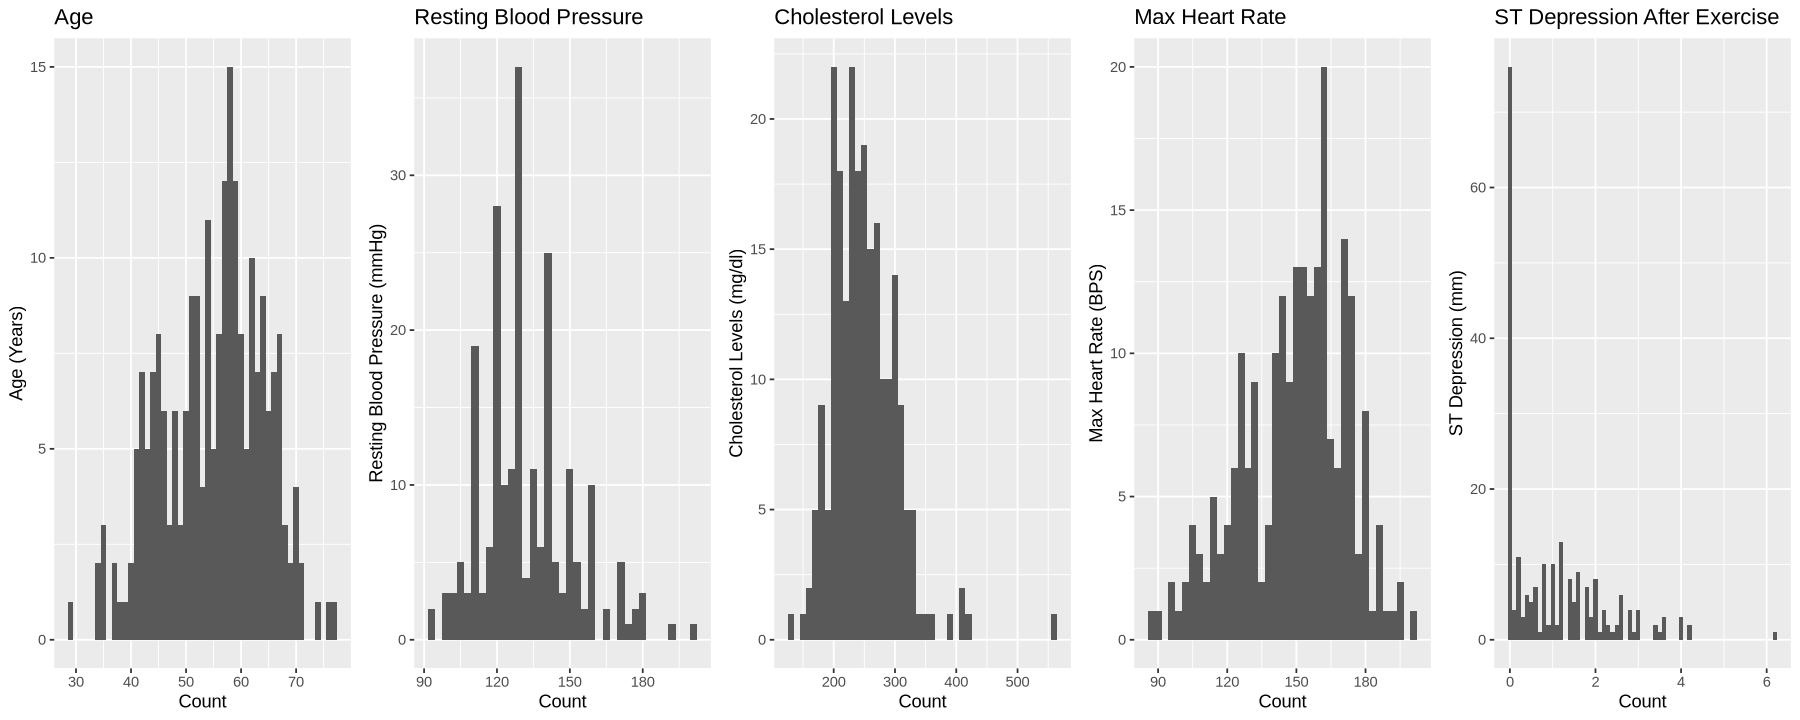

In [6]:
ageplot <- ggplot(heart_train, aes(x = age)) +
    geom_histogram(binwidth = 1) +
    labs(title = "Age") +
    xlab("Count") + ylab("Age (Years)") 

restingplot <- ggplot(heart_train, aes(x = restingbps)) +
    geom_histogram(binwidth = 3) +
    labs(title = "Resting Blood Pressure") +
    xlab("Count") + ylab("Resting Blood Pressure (mmHg)") 

cholesterolplot <- ggplot(heart_train, aes(x = chollevels)) +
    geom_histogram(binwidth = 10) +
    labs(title = "Cholesterol Levels") +
    xlab("Count") + ylab("Cholesterol Levels (mg/dl)") 

maxheartplot <- ggplot(heart_train, aes(x = maxheartrate)) +
    geom_histogram(binwidth = 3) +
    labs(title = "Max Heart Rate") +
    xlab("Count") + ylab("Max Heart Rate (BPS)") 

stdepressplot <- ggplot(heart_train, aes(x = stdepress)) +
    geom_histogram(binwidth = 0.1) +
    labs(title = "ST Depression After Exercise") +
    xlab("Count") + ylab("ST Depression (mm)") 

# plots <- ggplot(heart_train_long, aes(x = value)) +
#   geom_histogram(binwidth = 5) +
#   labs(title = "Distributions of Predictive Variables") +
#   facet_wrap(~name, scales = "free", ncol = 5)

plots <-  grid.arrange(ageplot, restingplot, cholesterolplot, maxheartplot, stdepressplot, ncol = 5)

The above histograms show the distributions of each of our predictive variables in our dataset. Each variable is roughly normally distributed, with the exception of ST Depression, which has a large concentration of datapoints around 0.

Methods:
Explain how you will conduct either your data analysis and which variables/columns you will use. Note - you do not need to use all variables/columns that exist in the raw data set. In fact, that's often not a good idea. For each variable think: is this a useful variable for prediction?
Describe at least one way that you will visualize the results

Expected outcomes and significance:
What do you expect to find?
What impact could such findings have?
What future questions could this lead to?
